In [17]:
import networkx as nx
import random
from matplotlib import cm
import matplotlib.pyplot as plt

### Import CTA data for the graph
g = nx.read_gml('cta.gml')
node_coords = {}
for n in g:
    node_coords[n] = g.nodes[n]['pos']

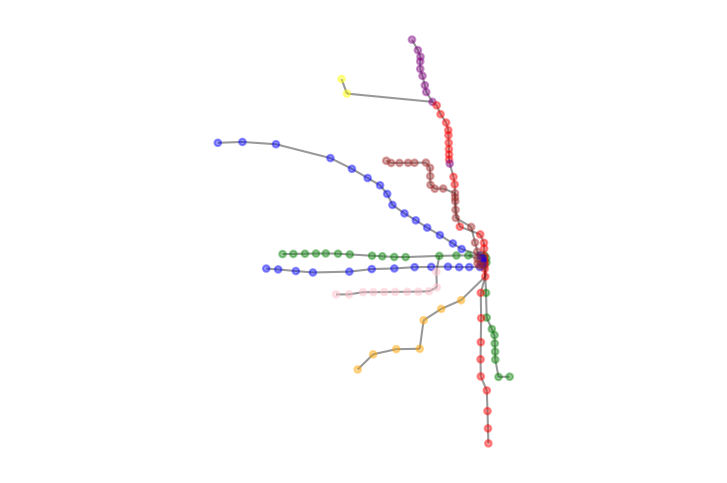

In [41]:
fig, ax = plt.subplots(dpi=150)
nx.draw(g, node_coords, 
        ax=ax, alpha=0.4, 
        node_size=10, 
        node_color=[g.nodes[i]['nodecolor'] for i in g.nodes])
plt.axis('equal')
plt.grid(which='both')
plt.show()

In [43]:
n_passengers = 1
timesteps = 10

class Passenger:
    def __init__(self, home, work):
        self.home = home
        self.work = work
        self.fees = 0
        self.transit_time = 0
        self.current = home
        self.intermediate_stops = []
        
        
def initialize():
    global passengers
    
    g = nx.read_gml('cta.gml')
    node_coords = {}
    for n in g:
        node_coords[n] = g.nodes[n]['pos']
        passengers = []

    nx.set_node_attributes(g, 0, 'population')  # number of passengers at a stop
    nx.set_node_attributes(g, 10, 'capacity')  # number of passengers a stop can handle
    
    for i in range(n_passengers):
        p = Passenger(home=random.choice(list(g.nodes)),
                      work=random.choice(list(g.nodes)))
        
        p.path = nx.shortest_path(g, p.home, p.work)
        passengers.append(p)
        g.nodes[p.home]['population'] += 1

        
def update():    
    for p in passengers:
        if p.current == p.home:
            p.route = nx.shortest_path(g, source=p.home, target=p.work)
            g.nodes[p.current]['population'] -= 1
            p.current = p.route[1]
            g.nodes[p.current]['population'] += 1
            p.fees += 1
            p.transit_time += 1
            


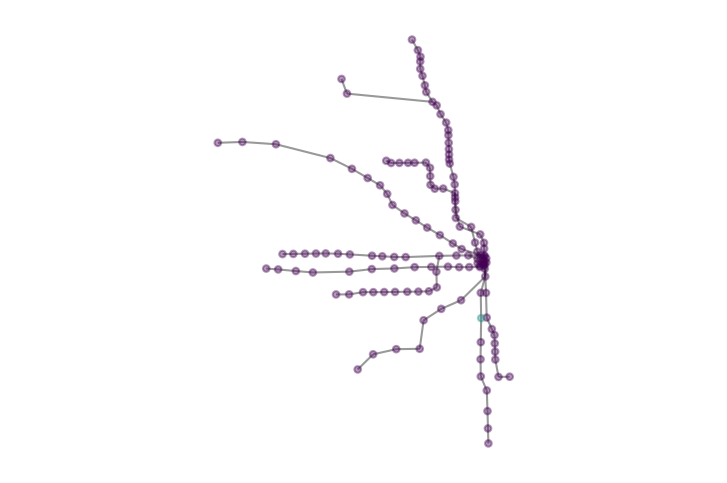

In [40]:
initialize()
for t in range(timesteps):
    update()

fig, ax = plt.subplots(dpi=150)
nx.draw(g, pos=node_coords, cmap=cm.viridis, vmin=0, vmax=2, ax=ax, alpha=0.4, 
        node_size=10, 
        node_color=[g.nodes[i]['population'] for i in g.nodes])
plt.axis('equal')
plt.grid(which='both')
plt.show()

at each timestep:
    - move toward next destination
    - add fare
    - add time
    - if desination reached, update to next destination

https://towardsdatascience.com/i-built-the-t-with-python-and-revamped-it-632127364f4e
    
- add 5 minute penalty for transfers
- if population exceeds capacity, wait